In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [131]:
b= sns
sns.set_theme(style="whitegrid") 
color=sns.color_palette("husl", 6)



In [4]:
df= pd.read_csv('/content/drive/MyDrive/Data science/My projects/Pakistan - Food Prices/pakistan-food-prices-1.csv')

In [5]:
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0


In [6]:
df.tail()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
5643,2018-04-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,15.0,51.0,8,293_465_15_51,NaN
5644,2018-05-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,15.0,51.0,8,293_465_15_51,NaN
5645,2018-06-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,15.0,51.0,8,293_465_15_51,NaN
5646,2018-07-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.38,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,15.0,51.0,8,293_465_15_51,NaN
5647,2018-08-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.0,PKR,Pakistan,Sindh,2277,Karachi,293.0,465,15.0,51.0,8,293_465_15_51,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5648 non-null   object 
 1   cmname    5648 non-null   object 
 2   unit      5648 non-null   object 
 3   category  5648 non-null   object 
 4   price     5648 non-null   object 
 5   currency  5648 non-null   object 
 6   country   5648 non-null   object 
 7   admname   5648 non-null   object 
 8   adm1id    5648 non-null   object 
 9   mktname   5648 non-null   object 
 10  mktid     5647 non-null   float64
 11  cmid      5648 non-null   object 
 12  ptid      5647 non-null   float64
 13  umid      5647 non-null   float64
 14  catid     5648 non-null   object 
 15  sn        5648 non-null   object 
 16  default   857 non-null    float64
dtypes: float64(4), object(13)
memory usage: 750.2+ KB


In [8]:
df.shape

(5648, 17)

In [9]:
df.loc[:10]

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
5,2004-05-15,Wheat flour - Retail,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
6,2004-06-15,Wheat flour - Retail,KG,cereals and tubers,13.405,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
7,2004-07-15,Wheat flour - Retail,KG,cereals and tubers,13.6,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
8,2004-08-15,Wheat flour - Retail,KG,cereals and tubers,13.75,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0
9,2004-09-15,Wheat flour - Retail,KG,cereals and tubers,13.75,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,1.0


In [10]:
df= df.drop(df.index[:1])

In [11]:
df= df.drop(['adm1id','mktid',	'cmid',	'ptid','umid',	'catid',	'sn',	'default'],axis=1)

In [12]:
df.head(3)

,date,cmname,unit,category,price,currency,country,admname,mktname
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,Quetta


In [13]:
df=df.rename(columns={'admname':'province','mktname':'city'})


In [14]:
df['cmname'].head(100)

1      Wheat flour - Retail
2      Wheat flour - Retail
3      Wheat flour - Retail
4      Wheat flour - Retail
5      Wheat flour - Retail
               ...         
96     Wheat flour - Retail
97     Wheat flour - Retail
98     Wheat flour - Retail
99     Wheat flour - Retail
100    Wheat flour - Retail
Name: cmname, Length: 100, dtype: object

In [ ]:
df['p_name'] = df['cmname']

In [16]:
df.tail(2)

,date,cmname,unit,category,price,currency,country,province,city,p_name
5646,2018-07-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.38,PKR,Pakistan,Sindh,Karachi,"Wage (non-qualified labour, non-agricultural) ..."
5647,2018-08-15,"Wage (non-qualified labour, non-agricultural) ...",Day,non-food,815.0,PKR,Pakistan,Sindh,Karachi,"Wage (non-qualified labour, non-agricultural) ..."


In [50]:
df= df.rename(columns={'cmname':'p_detail'})

In [52]:
df['p_name']= df['p_name'].apply(lambda x : x.split('(')[0])# after '-', use ( for split string value
df.p_name

1       Wheat flour 
2       Wheat flour 
3       Wheat flour 
4       Wheat flour 
5       Wheat flour 
            ...     
5643           Wage 
5644           Wage 
5645           Wage 
5646           Wage 
5647           Wage 
Name: p_name, Length: 5647, dtype: object

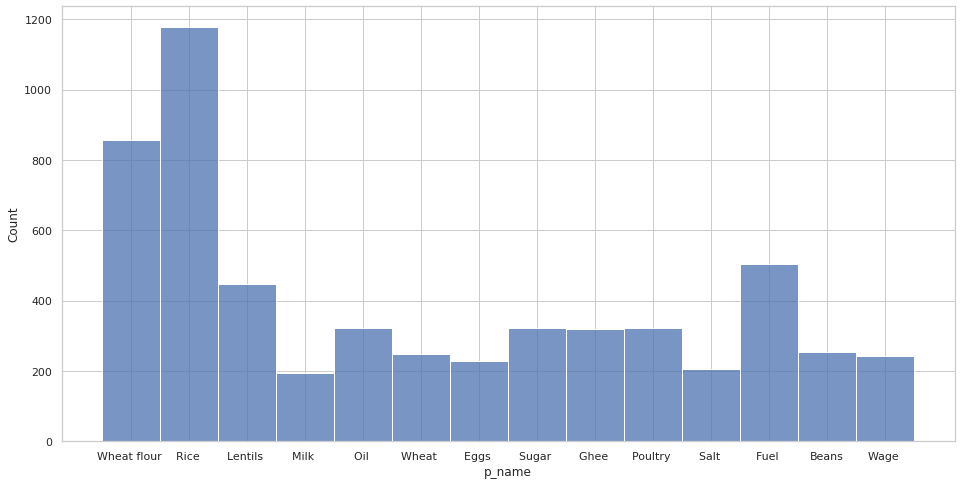

In [53]:
fig_dims = (16,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df.p_name)


In [54]:
#df['price'] =df['price'].astype(float)
df['price'] = df['price'].apply(lambda x: float(x))

In [55]:
df.isnull().sum().sort_values(ascending=False)

month       0
city        0
province    0
country     0
currency    0
price       0
category    0
p_detail    0
unit        0
p_name      0
date        0
dtype: int64

In [56]:
# check out the column with missing values
df[df.isnull().any(axis=1)].head()



,date,p_name,unit,p_detail,category,price,currency,country,province,city,month


In [57]:
#remove null values with rows
df=df.dropna()

In [58]:
df.head(3)

,date,p_name,unit,p_detail,category,price,currency,country,province,city,month
1,2004-01-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.00,PKR,Pakistan,Balochistan,Quetta,1
2,2004-02-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.00,PKR,Pakistan,Balochistan,Quetta,2
3,2004-03-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,14.25,PKR,Pakistan,Balochistan,Quetta,3


In [59]:
df= df[['date','p_name','unit','p_detail','category','price','currency','country','province','city']]

In [60]:
df.head(3)

,date,p_name,unit,p_detail,category,price,currency,country,province,city
1,2004-01-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.00,PKR,Pakistan,Balochistan,Quetta
2,2004-02-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.00,PKR,Pakistan,Balochistan,Quetta
3,2004-03-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,14.25,PKR,Pakistan,Balochistan,Quetta


In [61]:
df.price.describe()

count    5647.000000
mean      109.389438
std       117.594706
min         9.000000
25%        39.000000
50%        74.600000
75%       147.590000
max       815.380000
Name: price, dtype: float64

In [62]:
df.columns

Index(['date', 'p_name', 'unit', 'p_detail', 'category', 'price', 'currency',
       'country', 'province', 'city'],
      dtype='object')

In [63]:
df.nunique()

date         173
p_name        14
unit           4
p_detail      17
category       7
price       2358
currency       1
country        1
province       4
city           5
dtype: int64

In [64]:
df.province.unique()

array(['Balochistan', 'Khyber Pakhtunkhwa', 'Punjab', 'Sindh'],
      dtype=object)

In [65]:
df.drop_duplicates(inplace=True)
df.shape

(5647, 10)

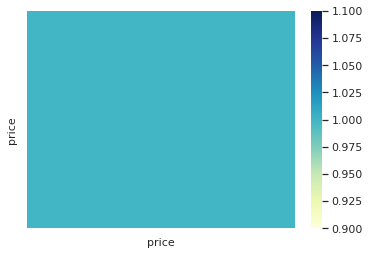

In [66]:
sns.heatmap(df.corr(),cmap="YlGnBu")
#you can find futher color map for heatmap, cmap="YlGnBu" on seaborn website


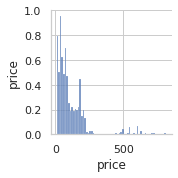

In [67]:
sns.pairplot(df)

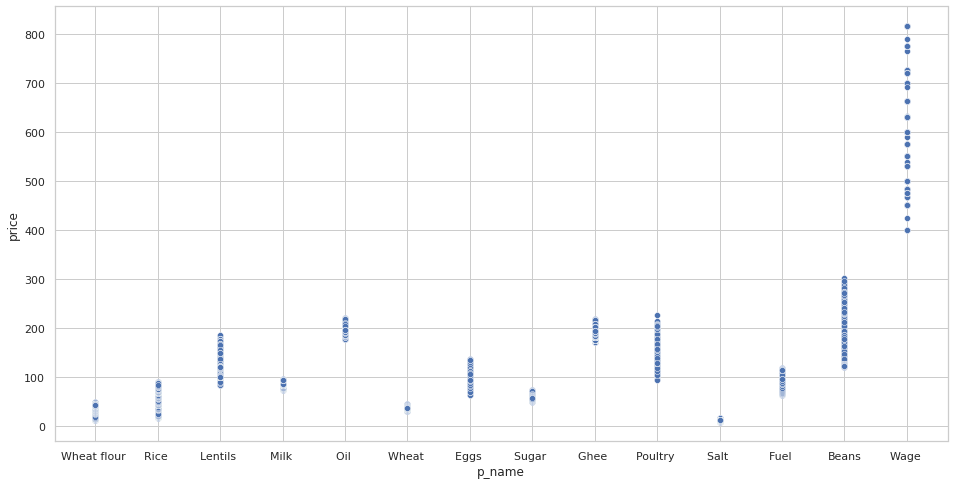

In [82]:
fig_dims =(16,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x=df.p_name, y =df.price)

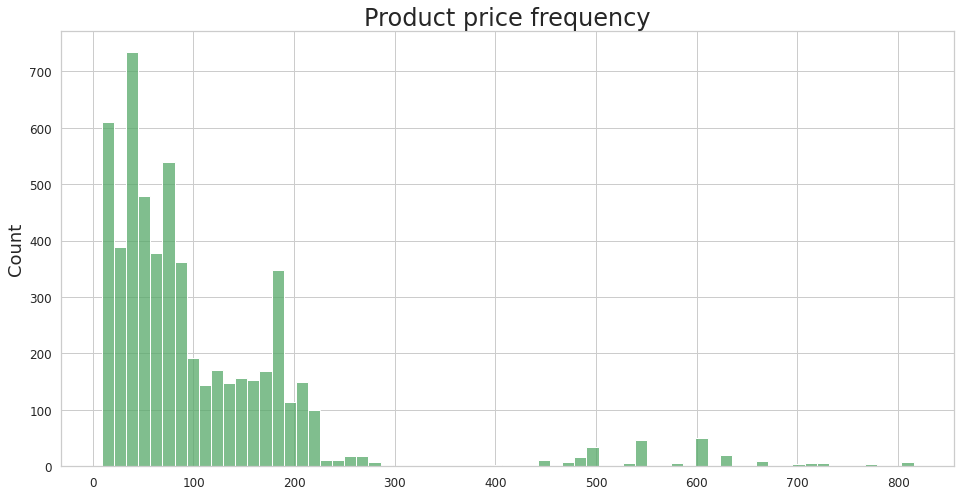

In [69]:
fig_dims =(16,8)
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.histplot(x=df.price, ax=ax, color='g')
b.axes.set_title('Product price frequency',fontsize=24)
b.set_xlabel('', fontsize=1)
b.set_ylabel('Count',fontsize= 18)
b.tick_params(labelsize= 12)


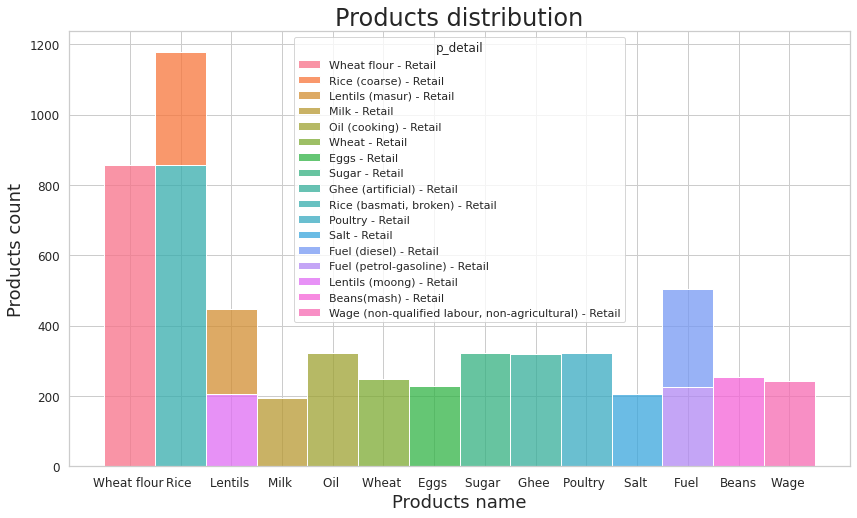

In [71]:
fig_dims =(14,8)
fig, ax = plt.subplots(figsize=fig_dims)
b= sns.histplot(x=df.p_name, ax=ax ,hue=df.p_detail, multiple='stack')
b.axes.set_title('Products distribution',fontsize=24)
b.set_xlabel('Products name', fontsize=18)
b.set_ylabel('Products count', fontsize=18)
b.tick_params(labelsize=12)

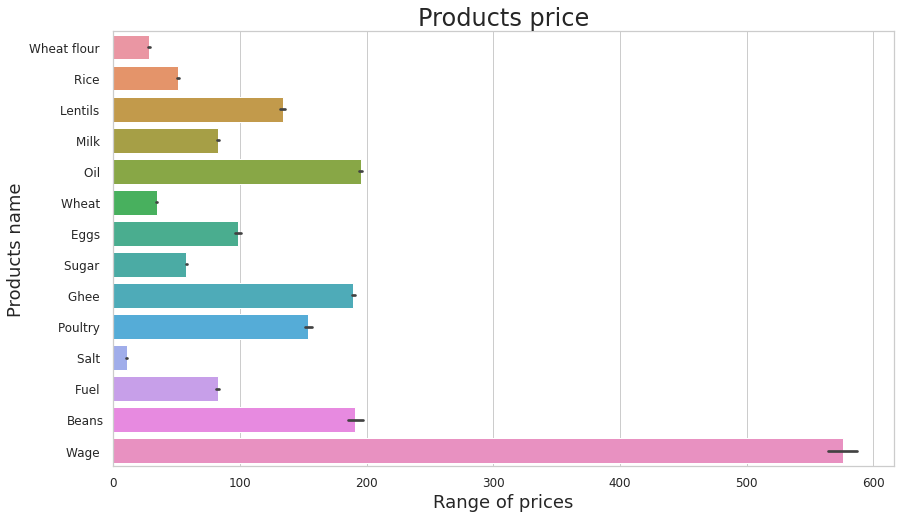

In [140]:
fig_dims =(14,8)
fig, ax = plt.subplots(figsize=fig_dims)
b= sns.barplot(x=df.price,y = df.p_name, ax=ax )

b.axes.set_title('Products price',fontsize=24)
b.set_xlabel('Range of prices', fontsize=18)
b.set_ylabel('Products name', fontsize=18)
b.tick_params(labelsize=12)

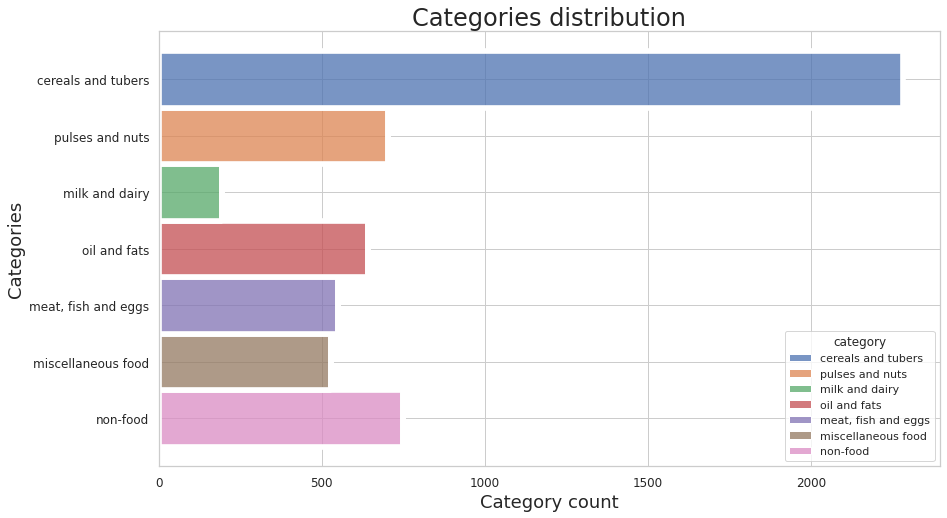

In [78]:
fig_dims =(14,8)
fig, ax = plt.subplots(figsize=fig_dims)
b= sns.histplot(y=df.category, ax=ax ,hue=df.category, multiple='stack')
b.axes.set_title('Categories distribution',fontsize=24)
b.set_xlabel('Category count', fontsize=18)
b.set_ylabel('Categories', fontsize=18)
b.tick_params(rotation=0,labelsize=12)

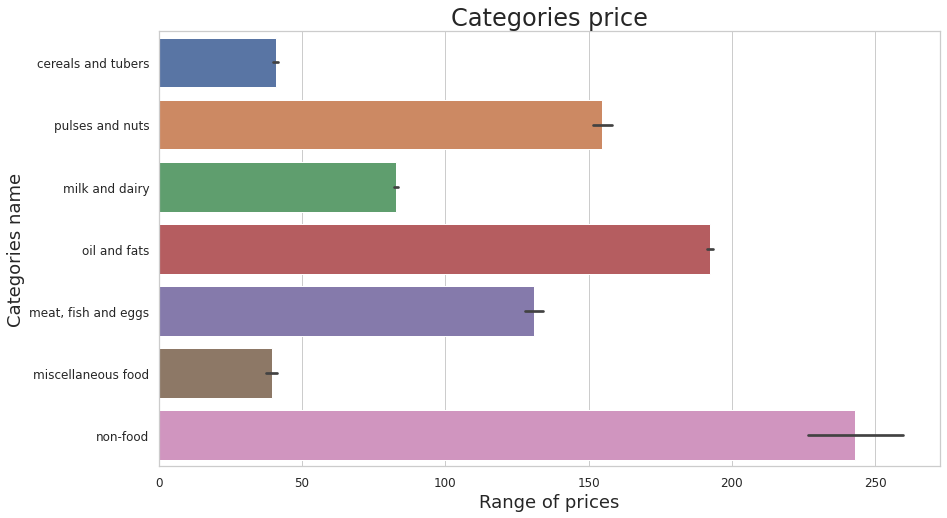

In [141]:
fig_dims =(14,8)
fig, ax = plt.subplots(figsize=fig_dims)
b= sns.barplot(x=df.price,y = df.category, ax=ax )
b.axes.set_title('Categories price',fontsize=24)
b.set_xlabel('Range of prices', fontsize=18)
b.set_ylabel('Categories name', fontsize=18)
b.tick_params(labelsize=12)

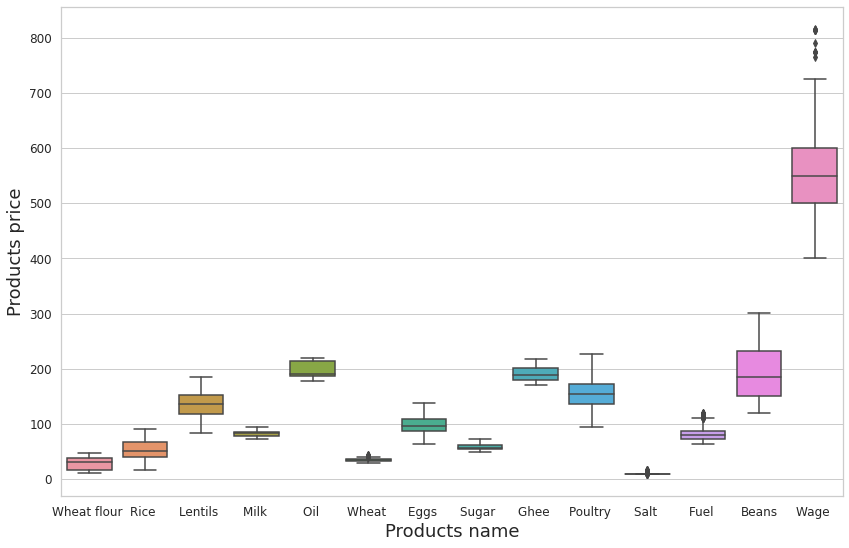

In [79]:
fig_dims =(14,9)
fig, ax = plt.subplots(figsize=fig_dims)
b =sns.boxplot(x=df.p_name,y=df.price)
b.axes.set_title('',fontsize=24)
b.set_xlabel('Products name', fontsize=18)
b.set_ylabel('Products price', fontsize=18)
b.tick_params(labelsize=12)

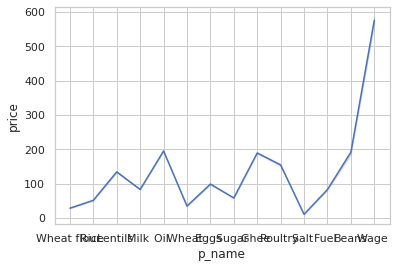

In [84]:
sns.lineplot(x= df.p_name, y=df.price)

In [86]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [90]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [91]:
df.head(2)

,date,p_name,unit,p_detail,category,price,currency,country,province,city,month,year
1,2004-01-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,1,2004
2,2004-02-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,2,2004


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5647 entries, 1 to 5647
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5647 non-null   object 
 1   p_name    5647 non-null   object 
 2   unit      5647 non-null   object 
 3   p_detail  5647 non-null   object 
 4   category  5647 non-null   object 
 5   price     5647 non-null   float64
 6   currency  5647 non-null   object 
 7   country   5647 non-null   object 
 8   province  5647 non-null   object 
 9   city      5647 non-null   object 
 10  month     5647 non-null   int64  
 11  year      5647 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 733.5+ KB


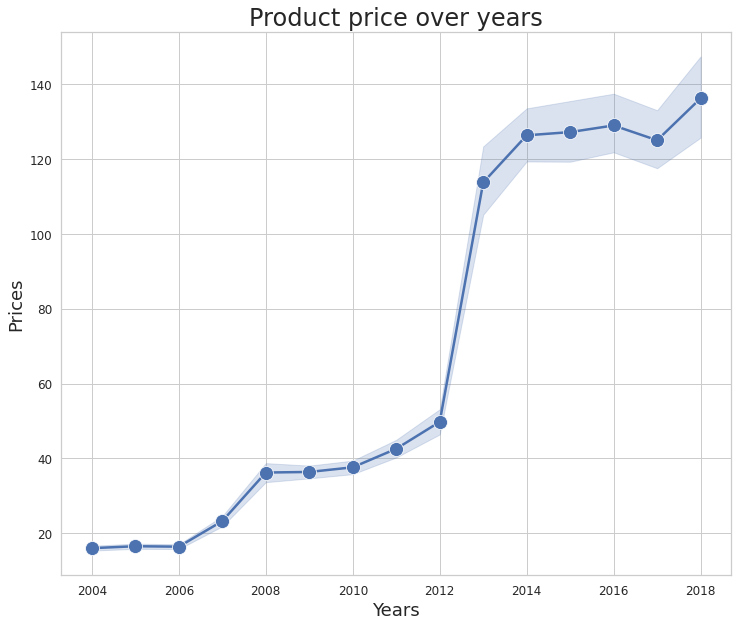

In [135]:
fig_dims =(12,10)
fig, ax = plt.subplots(figsize=fig_dims)
b=sns.lineplot(x=df.year, y=df.price, marker= 'o', markersize=14, linewidth=2.5)

b.axes.set_title('Product price over years', fontsize=24)
b.set_xlabel('Years',fontsize=18)
b.set_ylabel('Prices',fontsize=18)
b.tick_params(labelsize= 12)

In [138]:
df.head(13)

,date,p_name,unit,p_detail,category,price,currency,country,province,city,month,year
1,2004-01-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,1,2004
2,2004-02-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,2,2004
3,2004-03-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,14.0,PKR,Pakistan,Balochistan,Quetta,3,2004
4,2004-04-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,12.0,PKR,Pakistan,Balochistan,Quetta,4,2004
5,2004-05-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,5,2004
6,2004-06-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,6,2004
7,2004-07-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,7,2004
8,2004-08-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,8,2004
9,2004-09-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,9,2004
10,2004-10-15,Wheat flour,KG,Wheat flour - Retail,cereals and tubers,13.0,PKR,Pakistan,Balochistan,Quetta,10,2004


In [46]:
df